# Assignment1

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Dylan Wijman |10651012|dylanwijman@hotmail.com|
|Eline Steensma|10589813|elinesteensma@gmail.com|
|Sjoerd Paardekooper|10278397|sjoerd.paardekooper@gmail.com|


### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='https://github.com/dylanwijman/data-science/blob/master/pledge.jpg?raw=true'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


# Q1 (Monty Hall problem)

This is the part you hand in from the [warm up notebook](MontyHall.ipynb).

##  This counts for your mark

Generalize your simulation code to handle the case of `n` doors.


This sentence can be read in two ways, giving very different outcomes! You must program both, and understand that it all makes sense.


### Your work
For both interpretations, give a plot with the number of doors on the x-axis and the win_percentage on the y-axis, and plot that value for the two strategies for numbers of doors between 3 and 20. 

Describe briefly what is going on here, and why the plots makes sense.


### Interpretation  1
* There are _n_ doors.
* You have chosen one door.
* The host opens one door as before (it is not the door you have chosen and not a door with the prize)
* Now you switch or not.

In [19]:
import random
import numpy as np
    
def simulate_prizedoor(nsim):
    answer = np.array([random.randint(0,2) for i in range (nsim)])
    return answer
    
def simulate_guess(nsim):
    guesses = np.array([random.randint(0,2) for guess in range (nsim)])
    return guesses

    
def goat_door(prizedoors, guesses):
    fh = []
    for simulation in range(len(prizedoors)):
        sett = {0,1,2}
        deuren = sett - {prizedoors[simulation] , guesses[simulation]}
        goat = random.sample(deuren, 1)
        fh.append(goat[0])
    goatdoors = np.array(fh)
    return goatdoors
    
    goat_door(np.array([0, 1, 2]), np.array([1, 1, 1]))

def switch_guess(goatdoor, guesses):
        lastdoors = []
        goatdoor = np.array(goatdoor).tolist()
        guesses = np.array(guesses).tolist()
        for simulation in range(len(guesses)):
            options = {0,1,2}
            option_doors = options - {goatdoor[simulation], guesses[simulation]}
            door = random.sample(option_doors, 1)
            lastdoors.append(door[0])
        the_door = np.array(lastdoors)
        return the_door

def win_percentage(guesses, prizedoors):
    win_perc = (prizedoors == guesses).mean() * 100
    return win_perc


n_sim = 10000
guesses = simulate_guess(n_sim)
print "guesses = ", guesses, type(guesses)
prizedoors = simulate_prizedoor(n_sim)
print "prizedoors = ", prizedoors, type(prizedoors)
goatdoor = goat_door(prizedoors, guesses)
print "goatdoor = ", goatdoor, type(goatdoor)
switched_guess = switch_guess(goatdoor, guesses)
print "switched_guess = ", switched_guess, type(switched_guess)

print "If the contestant does not switch doors the win percentage is", win_percentage(guesses, prizedoors), "%"
print "If the contestant switches doors the win percentage is", win_percentage(switched_guess, prizedoors), "%"

if win_percentage(guesses, prizedoors) > win_percentage(switched_guess, prizedoors):
    print "The contestant should not switch doors"
else:
    print "The contestant should switch doors"


guesses =  [1 0 1 ..., 1 1 2] <type 'numpy.ndarray'>
prizedoors =  [0 0 2 ..., 1 0 1] <type 'numpy.ndarray'>
goatdoor =  [2 1 0 ..., 0 2 0] <type 'numpy.ndarray'>
switched_guess =  [0 2 2 ..., 2 0 1] <type 'numpy.ndarray'>
If the contestant does not switch doors the win percentage is 32.74 %
If the contestant switches doors the win percentage is 67.26 %
The contestant should switch doors


# Interpretation 2
* There are _n_ doors.
* You have chosen one door.
* The host opens _all except two doors_, namely your door, and a random other door.  Behind none of the opened doors lies the prize.

simulate_prizedoor(nsim = 1000, n = 30)= [0 5 5 0 7 6 1 9 9 1 7 7 0 7 0]
simulate_guess(nsim = 1000, n = 30)= [8 5 2 5 9 2 4 8 6 7 3 7 5 1 5]
simulate_switch(simulate_prizedoor(nsim = 10, n), simulate_guess(10, n), n) = [4 3 6 9 2 8 3 9 2 4 6 9 1 5 0]
If the contestant does not switch doors the win percentage is 10.3 %
If the contestant switches doors the win percentage is 10.9 %
The contestant should switch doors
*** PLOT Intepr 1 ***


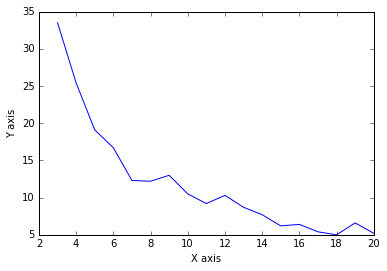

In [20]:
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

nsim = 1000 # aantal simulaties
n = 10 # Aantal deuren


def simulate_prizedoor(nsim, n):
    return np.random.randint(n, size=nsim)

prizedoors = simulate_prizedoor(nsim, n)
print "simulate_prizedoor(nsim = 1000, n = 30)=", prizedoors[:15]
    
    
def simulate_guess(nsim, n):
    return np.random.randint(n, size=nsim)

guesses = simulate_guess(nsim, n)
print "simulate_guess(nsim = 1000, n = 30)=", guesses[:15]


def simulate_switch(prizedoor, guess, n):
    switched_list = []
    for sim in range(prizedoor.shape[0]):
        # Nieuw gekozen deur is een deur waar de prijs niet achter zit
        if prizedoor[sim] == guess[sim]:
            numbers = range(0,int(prizedoor[sim])) + range(int(prizedoor[sim]),int(n))
            switched_list.append(random.choice(numbers))
        # Niew gekozen deur is de deur waar wel de prijs achter zit            
        else:
            switched_list.append(prizedoor[sim])
    return np.array(switched_list)
            
            

print "simulate_switch(simulate_prizedoor(nsim = 10, n), simulate_guess(10, n), n) =", simulate_switch(simulate_prizedoor(nsim, n), simulate_guess(nsim, n), n)[:15]


def win_percentage(guesses, prizedoors):
    win = float(0)
    for sim in range(len(guesses)):
        if guesses[sim] == prizedoors[sim]:
            win += 1
    win_perc = (win / len(guesses)) * 100
    return win_perc

def win_array(x):
    return int(win_percentage(simulate_switch(simulate_prizedoor(nsim, x), simulate_guess(nsim, x), x), simulate_prizedoor(nsim,x)))


print "If the contestant does not switch doors the win percentage is", win_percentage(simulate_guess(nsim, n), simulate_prizedoor(nsim,n)), "%"
print "If the contestant switches doors the win percentage is", win_percentage(simulate_switch(simulate_prizedoor(nsim, n), simulate_guess(nsim, n), n), simulate_prizedoor(nsim,n)), "%"

if win_percentage(simulate_guess(nsim, n), simulate_prizedoor(nsim,n)) >  win_percentage(simulate_switch(simulate_prizedoor(nsim, n), simulate_guess(nsim, n), n), simulate_prizedoor(nsim,n)):
    print "The contestant should not switch doors"
else:
    print "The contestant should switch doors"

print "*** PLOT Intepr 1 ***"


x = np.linspace(3, 20, 18)
y = [win_percentage(simulate_switch(simulate_prizedoor(nsim, i), simulate_guess(nsim, i), i), simulate_prizedoor(nsim,i)) for i in x]
plt.plot(x, y)

plt.xlabel("X axis")
plt.ylabel("Y axis") 


# Uitleg 

* hier komt jullie uitleg

# Q2 Notebook assignment


### [Go to the lecture slides here](https://github.com/dylanwijman/data-science/blob/master/Assignments/Inlever%20Assignments/10651012_10589813_10278397_week1_q2.ipynb)


[https://github.com/dylanwijman/data-science/blob/master/Assignments/Inlever%20Assignments/10651012_10589813_10278397_week1_q2.ipynb](https://github.com/dylanwijman/data-science/blob/master/Assignments/Inlever%20Assignments/10651012_10589813_10278397_week1_q2.ipynb)